In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("german_credit_data.csv",index_col=0)

In [37]:
data.head()



,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('german_credit_data.csv')

# Preprocess data
data = data.dropna()  # Drop rows with missing values

# Convert categorical data to numerical data
label_encoders = {}
for column in data.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
# Separate features and target
X = data.drop(['Credit amount', 'Unnamed: 0'], axis=1)
y = data['Credit amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Create a new dataframe with the relevant features for the new person
new_person = pd.DataFrame({
    'Age': [30],
    'Sex': ['male'],
    'Job': [2],
    'Housing': ['own'],
    'Saving accounts': ['little'],
    'Checking account': ['little'],
    'Credit amount': [0],
    'Duration': [12],
    'Purpose': ['car']
})

# Convert categorical data to numerical data using the label encoders
for column in new_person.select_dtypes(include=['object']):
    new_person[column] = label_encoders[column].transform(new_person[column])

# Scale the features using the same scaler used for training
new_person_scaled = scaler.transform(new_person.drop('Credit amount', axis=1))

# Make a prediction using the trained model
predicted_credit_amount = model.predict(new_person_scaled)

# Print the predicted credit amount
print('Predicted credit amount:', predicted_credit_amount[0])



Mean Squared Error: 4061313.41442081
Predicted credit amount: 2272.4901936410424


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


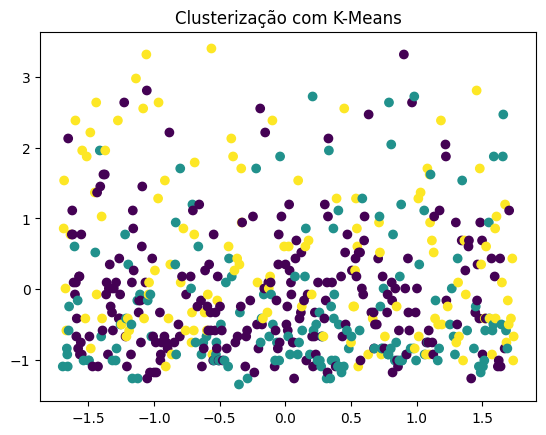

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionar as colunas relevantes para a clusterização (excluindo a coluna 'Limite_de_Credito')
X = data.drop('Credit amount', axis=1)

# Normalizar os dados para ter média zero e desvio padrão igual a um
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=402)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusterização com K-Means')
plt.show()

In [88]:
data =data.drop("Unnamed: 0", axis=1)
correlation_matrix = data.corr()

correlation_matrix
#credito e duração trabalho e credito tem uma boa correlação

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
Age,1.000000,0.126859,0.039771,-0.312977,-0.018856,0.001643,0.082014,0.001549,-0.083995,0.156996
Sex,0.126859,1.000000,0.072618,-0.188279,-0.023686,-0.029780,0.080403,0.078630,-0.096625,-0.226301
Job,0.039771,0.072618,1.000000,-0.126405,-0.039570,-0.008119,0.334721,0.200794,-0.029202,0.356123
Housing,-0.312977,-0.188279,-0.126405,1.000000,0.049783,-0.026409,-0.123783,-0.131549,0.038990,-0.353568
Saving accounts,-0.018856,-0.023686,-0.039570,0.049783,1.000000,0.159763,-0.066758,-0.041800,-0.037613,-0.136604
Checking account,0.001643,-0.029780,-0.008119,-0.026409,0.159763,1.000000,-0.016848,-0.047956,0.011938,-0.152420
Credit amount,0.082014,0.080403,0.334721,-0.123783,-0.066758,-0.016848,1.000000,0.613298,-0.113754,0.372528
Duration,0.001549,0.078630,0.200794,-0.131549,-0.041800,-0.047956,0.613298,1.000000,-0.074135,0.502202
Purpose,-0.083995,-0.096625,-0.029202,0.038990,-0.037613,0.011938,-0.113754,-0.074135,1.000000,-0.173495
Cluster,0.156996,-0.226301,0.356123,-0.353568,-0.136604,-0.152420,0.372528,0.502202,-0.173495,1.000000


In [100]:
new_person = pd.DataFrame({
    'Age': [18],
    'Sex': ['female'],
    'Job': [1],
    'Housing': ['own'],
    'Saving accounts': ['little'],
    'Checking account': ['little'],
    'Credit amount': [0],
    'Duration': [12],
    'Purpose': ['car']
})

# Convert categorical data to numerical data using the label encoders
for column in new_person.select_dtypes(include=['object']):
    new_person[column] = label_encoders[column].transform(new_person[column])

# Scale the features using the same scaler used for training
new_person_scaled = scaler.transform(new_person.drop('Credit amount', axis=1))

# Make a prediction using the trained model
predicted_credit_amount = model.predict(new_person_scaled)

# Print the predicted credit amount
print('Predicted credit amount:', predicted_credit_amount[0])

#mulher recebe mais que homem e tem mais credito

Predicted credit amount: 1051.737445916352


In [104]:
new_person = pd.DataFrame({
    'Age': [60],
    'Sex': ['female'],
    'Job': [1],
    'Housing': ['own'],
    'Saving accounts': ['little'],
    'Checking account': ['little'],
    'Credit amount': [0],
    'Duration': [24],
    'Purpose': ['car']
})

# Convert categorical data to numerical data using the label encoders
for column in new_person.select_dtypes(include=['object']):
    new_person[column] = label_encoders[column].transform(new_person[column])

# Scale the features using the same scaler used for training
new_person_scaled = scaler.transform(new_person.drop('Credit amount', axis=1))

# Make a prediction using the trained model
predicted_credit_amount = model.predict(new_person_scaled)

# Print the predicted credit amount
print('Predicted credit amount:', predicted_credit_amount[0])

Predicted credit amount: 3582.9317116966877
